In [7]:
import numpy as np
import matplotlib.pyplot as plt
from RungeKutta.RK2DOF import *
%matplotlib inline

In [8]:
# Canonic form matrix of the pelican robot, which returns the acceleration cleared.
def BCG(v, u):
    # Variables of positions and speeds
    q1 = q1i = u[0]
    q2 = q2i = u[1]
    q1p = v[0]
    q2p = v[1]
    
    qd = [[np.pi / 10, np.pi / 30]]
    t1 = qd[0][0] - q1i
    t2 = qd[0][1] - q2i
    qt = [t1, t2]
    
    # Gain Kp
    Kp = [
        [30.0, 0.0],
        [0.0, 30.0]
    ]
    
    # Gain Kv
    Kv  = [
        [7.0, 0.0],
        [0.0, 3.0]
    ]
    
    tau = np.dot(Kp, qt) - np.dot(Kv, v)
    
    # Parameters of the robot
    l1 = 0.26
    l2 = 0.26
    lc1 = 0.0983
    lc2 = 0.0229
    m1 = 6.5225
    m2 = 2.0458
    I1 = 0.1213
    I2 = 0.01616
    g = 9.81
    
    # Inertial Matrix
    B11 = m1 * lc1 ** 2 + I1 + m2 * l1 ** 2 + m2 * lc2 ** 2 + 2 * m2 * l1 * lc2 * np.cos(q2) + I2
    B12 = m2 * lc2 ** 2 + m2 * l1 * lc2 * np.cos(q2) + I2
    B21 = m2 * lc2 ** 2 + m2 * l1 * lc2 * np.cos(q2) + I2
    B22 = m2 * lc2 ** 2 + I2

    B = [
        [B11, B12],
        [B21, B22]
    ]
    
    # Vector of centrifugal and Coriolis forces
    C11 = - ((m2 * l1 * lc2 * np.sin(q2)) * q2p)
    C12 = - ((m2 * l1 * lc2 * np.sin(q2)) * (q1p + q2p))
    C21 =   ((m2 * l1 * lc2 * np.sin(q2)) * q1p)
    C22 = 0

    C = [
        [C11, C12],
        [C21, C22]
    ]
    
    # vector of gravitational forces and torques
    G11 = m1 * g * lc1 * np.sin(q1) + m2 * g * l1 * np.sin(q1) + m2 * g * lc2 * np.sin(q1 + q2)
    G12 = m2 * g * lc2 * np.sin(q1 + q2)
    G = [G11, G12]
    
    
    Bi = np.linalg.inv(B)
    Cqp = np.dot(C, v)
    qpp = np.matmul(Bi, (tau - Cqp - G))
    
    return qpp

def f(v):
    return v

In [9]:
Pelican = Robot2DOF(f, BCG)
ui = [0.0, 0.0]
vi = [0.0, 0.0]
ti = 0.0
h = 0.01
done = 2
values = Pelican.RK(ti, ui, vi, done, h)

## Position Graph

Text(0, 0.5, '$ q $')

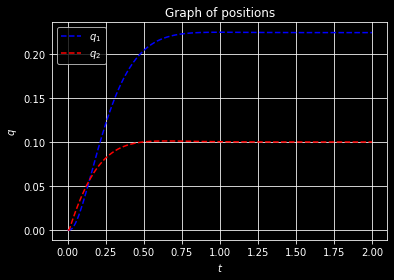

In [10]:
us = values[0]
ts = values[2]
i = values[3]
q1 = [0.0]
q2 = [0.0]

for qs in range(0, i):
    q1.append(us[qs][0]) 
    q2.append(us[qs][1])

plt.style.use('dark_background')
plt.title("Graph of positions")
plt.plot(ts, q1, "b--", label = "$q_1$")
plt.plot(ts, q2, "r--", label = "$q_2$")
plt.legend()
plt.grid()
plt.xlabel("$ t $")
plt.ylabel("$ q $")

## Velocity Graph

Text(0, 0.5, '$ \\dot{q} $')

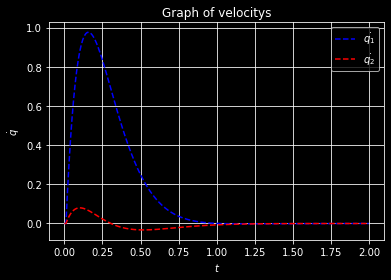

In [11]:
vs = values[1]
q1p = [0.0]
q2p = [0.0]

for qps in range(0, i):
    q1p.append(vs[qps][0]) 
    q2p.append(vs[qps][1])

plt.style.use('dark_background')
plt.title("Graph of velocitys")
plt.plot(ts, q1p, "b--", label = "$\dot{q_1}$")
plt.plot(ts, q2p, "r--", label = "$\dot{q_2}$")
plt.legend()
plt.grid()
plt.xlabel("$ t $")
plt.ylabel("$ \dot{q} $")

## Error Graph

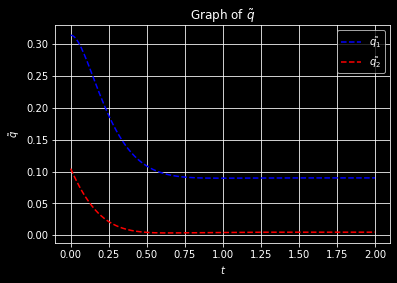

In [12]:
Pelican.error()